# Introduction to Astropy and Astroquery

In this notebook, you will learn about:
- the [Astropy and Astroquery](#Introduction-to-Astropy-and-Astroquery) Python packages, 
- and using the [Horizons System using Astroquery](#Querying-the-Horizons-System-using-Astroquery) to retieve a celestial body orbit's position and velocity data.

## Astropy and Astroquery

Astropy is a software package developed by the astronmy community to support data analysis and research activities. According to the [Astropy](https://www.astropy.org/) webpage:
> "The Astropy Project is a community effort to develop a core package for astronomy using the Python programming language and improve usability, interoperability, and collaboration between astronomy Python packages."

Astroquery is a module in Astropy. According to the [Astroquery](https://astroquery.readthedocs.io/en/latest/#) webpage:
> "Astroquery is a set of tools for querying astronomical web forms and databases."

To install both Astropy and Astroquery in Anaconda you need to run the following [installation command](https://anaconda.org/astropy/astroquery):

    conda install -c astropy astroquery

To verify that both Astropy and Astroquery have been correctly installed, run the following Python code on a script or Jupyter notebook:

In [8]:
# Load the SIMBAD method from astroquery
from astroquery.simbad import Simbad

# Perform a query to the SIMBAD service for data on the "m1" object, i.e., Messier 1 (The Crab Nebula)
result_table = Simbad.query_object("m1")

#Print results
print("Query results:\n")
print(result_table)

Query results:

MAIN_ID     RA        DEC    ...     COO_BIBCODE     SCRIPT_NUMBER_ID
         "h:m:s"    "d:m:s"  ...                                     
------- ---------- --------- ... ------------------- ----------------
  M   1 05 34 30.9 +22 00 53 ... 1995AuJPh..48..143S                1


If you get no error messages and an output similar to the one below, then Astropy and Astroquery should be correctly installed.
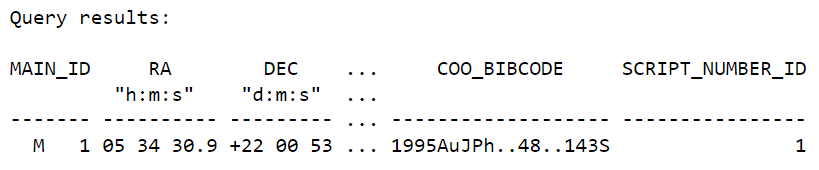

## Querying the Horizons System using Astroquery

We will use the Horizons System to get the orbit data of celestial objects. NASA's Jet Propulsion Laboratory (JPL) maintains and provides access to the [Horizons System](https://ssd.jpl.nasa.gov/horizons/). According to the Horizons System's webpage:
> "The JPL Horizons on-line solar system data and ephemeris computation service provides access to key solar system data ...".

The Horizons System provides data for solar system objects, including: asteroids, comets, planetary satellites, planets, the Sun, select spacecraft and system barycenters.

It is possible to access the Horizons System through various interfaces, e.g., web, email and API. In this notebook we will use the Astroquery class [__*HorizonsClass*__](https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html), which offers a clean and easy way to access the Horizons System in Python.

### Using the HorizonsClass

To effectively use the __*HorizonsClass*__, first we need to understand the basic use of the Horizons Service. A condensed list of the basic steps to use the service is provided below:
1. Select the Ephemeris Type
2. Select a Target Body
3. Specify an Observer Location (or Coordinate Centre)
4. Specify Time
5. Define Table Settings

I recommend visiting the JPL's [tutorial](https://ssd.jpl.nasa.gov/horizons/tutorial.html) for reference, it is very comprehensive and well documented. For more information you can read the Horizons System [manual](https://ssd.jpl.nasa.gov/horizons/manual.html)

Horizons categorises objects into Major (e.g., planets, natural satellites, spacecraft) and Small (e.g., comets, asteroids) bodies.

For the first example, we will request Mercury's orbit data.

### Requesting Mercury's orbit data 

Let's start by importing the Horizonsclass, we will use the alias __*Horizons*__.

In [9]:
from astroquery.jplhorizons import Horizons

Now, let's import some additional libraries and modules

In [10]:
# Command to enable interactive Matplotlib plots
%matplotlib notebook


# Import Numpy for numeric computations
import numpy as np
# Import Matplotlib's Pyplot class to produce plots/graphs
import matplotlib.pyplot as plt
# Import Astropy's Time class to manipulate dates/times
from astropy.time import Time
# Import Date's date and timedelta for date calculations
from datetime import date, timedelta

In [11]:
# Define stop date as today
stop_date = date.today()
# Define time range for query in days
n_years = 1
year_days = 365
days=n_years*year_days

# Compute start date
start_date = (stop_date-timedelta(days)).isoformat()
# Store stop_date in ISO format
stop_date = stop_date.isoformat()
# Define step size
step = '1d'

# Print computed values to screen
print("The query will be set with the following parameters:\
      \n\tstart date = {}, \n\tstop date = {} (today), \n\tand step = {}.".format(start_date,stop_date,step))

The query will be set with the following parameters:      
	start date = 2022-05-16, 
	stop date = 2023-05-16 (today), 
	and step = 1d.


Now, let's create a Horizons [instance](https://en.wikipedia.org/wiki/Instance_(computer_science)) to store Mercury's data.

The minimum required input are:
 - __*id*__, defines the target object;
 - __*location*__, defines the observer's location, i.e., the origin of the coordinate system for the data;
 - __*epochs*__, defines the time range for the query.

In [12]:
# Horizons instance to store Mercury's data
mercury = Horizons(id=1, # Set id for Mercury
                   location='@sun', # Set observer's location as the Sun
                   epochs={'start': start_date, # Set start, stop and step to previously computed values
                           'stop': stop_date,
                           'step': step})

The code above does not perform the data query. For that, we need to use one of the embedded methods. The __*HorizonsClass*__ provide six methods to perform data queries, namely: __*elements*__, __*elements_async*__, __*ephemerides*__, __*ephemerides_async*__, __*vectors*__, and __*vectors_async*__. For more information on these methods, visit the [__*HorizonsClass*__](https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html) webpage.

In this notebook, we will only use the __*vectors*__ method. To request Mercury's orbit data run the command below:

In [13]:
# Request Mercury's orbit data as vectors and store it in mercury_data
mercury_data = mercury.vectors()

The data is store as a *dictionary* data type. To display the available run the following command:

In [14]:
print("The data available after the query is:\n{}".format(mercury_data.keys()))

The data available after the query is:
['targetname', 'datetime_jd', 'datetime_str', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'lighttime', 'range', 'range_rate']


The keys/fileds below store the following data:
- 'targetname', contains the target's (celestial object) name and identifier (id);
- 'datetime_jd' and 'datetime_str', contain the timestamp in string and Julian Date formats, rescpectively;
- 'x', 'y' and 'z', contain the orbit's X, Y and Z coordinates;
- and 'vx', 'vy' and 'vz', contain the orbit's speed in the X, Y and Z directions.

For a full description of the keys/fields visit the [__*HorizonsClass*__](https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html) webpage.

Next, try displaying some of these fields. How easy is to interpret them?

In [15]:
mercury_data['targetname']

Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)
Mercury Barycenter (199)


Now, complete the following functions to extract the orbit's position and velocity data.

In [30]:
def get_celestial_body_pos_data(celestial_body):
    
    # Extract orbit's time and position data
    time  = Time(celestial_body['datetime_jd'],format='jd').byear
    pos_x,pos_y,pos_z = celestial_body['x'],celestial_body['y'],celestial_body['z']
    
    
    
    # Return results
    return time, pos_x, pos_y, pos_z

def get_celestial_body_vel_data(celestial_body):
    
    # Extract orbit's time and velocity data
    time  = Time(celestial_body['datetime_jd'],format='jd').byear
    v_x,v_y,v_z = celestial_body['vx'],celestial_body['vy'],celestial_body['vz']
    
    
    
    # Return results
    return time, vel_x, vel_y, vel_z

In [31]:
mercury_orbit_time,mercury_orbit_px,mercury_orbit_py,mercury_orbit_Pz = get_celestial_body_pos_data(mercury_data)

Can you produce a plot similar to the one below?
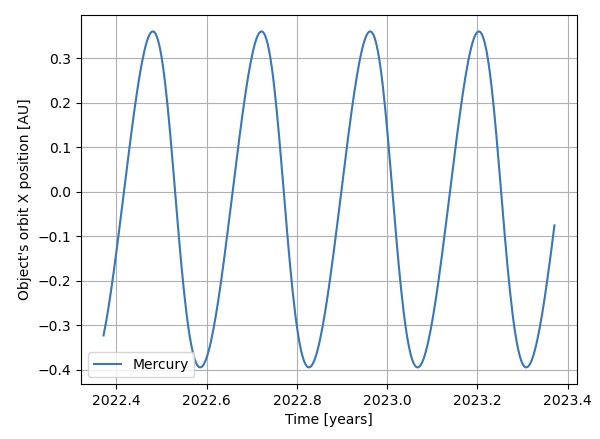
Complete the code below:

In [18]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


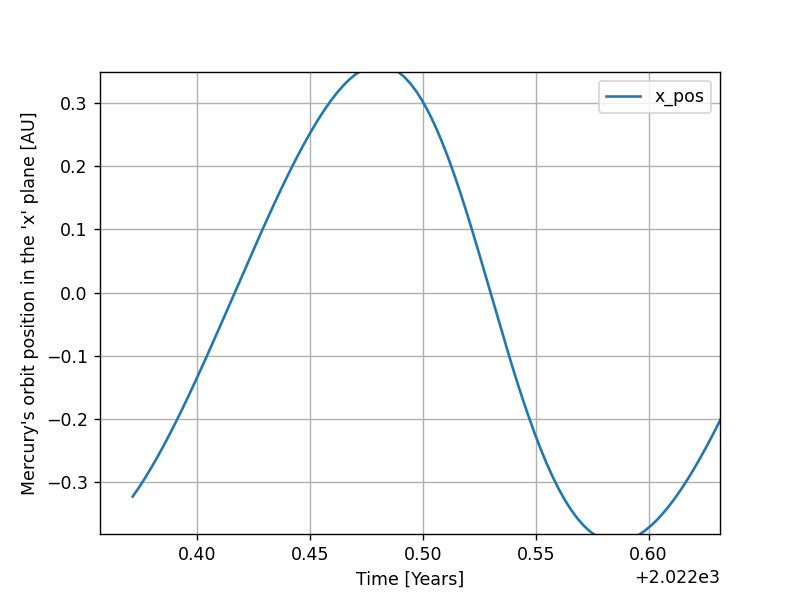

In [32]:
plt.figure(1)
plt.plot(mercury_orbit_time,mercury_orbit_px, label="x_pos")
plt.ylabel("Mercury's orbit position in the 'x' plane [AU]")
plt.xlabel("Time [Years]")
plt.grid()
plt.legend()
plt.show()

### Additional material to cover on your own and at your own pace

You might want to continue exploring some of the embedded functions/methods that are available when working with __*Astropy*__ aand __*Astroquery*__. I suggest trying the following:
- plotting the orbit's velocity data,
- retrieving data for different time range/period,
- retrieving with the observer's location set as the Earth (i.e., the *location* input parameter). 